# 15th Question

### How many distinct countries are represented in the dataset?

Installing needed packages

In [ ]:
%pip install numpy pandas pyarrow matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


Importing needed packages

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os

# Reading .parquet data
According to question and ERD in /data/ERD folder as Tennis Schema.pdf , We are analyzing and Reading data of matchs
It might take few seconds to read data

Reading data of home matches required information :

In [3]:
days_to_query_home = os.listdir("../data/raw/tennis_data")
files_to_load_home = []

for day in days_to_query_home:
    files_to_load_home.extend(
        glob(f"../data/raw/tennis_data/{day}/data/raw/raw_match*/home_team_1*.parquet")
    )

home_statistics_data_frame = pd.concat(
    [
        pd.read_parquet(
            file,
            columns=["match_id", "residence"],
        )
        for file in files_to_load_home
    ],
    ignore_index=True,
)

Reading data of away matches required information :

In [4]:
days_to_query_away = os.listdir("../data/raw/tennis_data")
files_to_load_away = []

for day in days_to_query_away:
    files_to_load_away.extend(
        glob(f"../data/raw/tennis_data/{day}/data/raw/raw_match*/away_team_1*.parquet")
    )

away_statistics_data_frame = pd.concat(
    [
        pd.read_parquet(
            file,
            columns=["match_id", "name", "residence"],
        )
        for file in files_to_load_away
    ],
    ignore_index=True,
)

## Concat whole data and make a dataframe of countries

In [5]:
home_statistics_data_frame.sort_values(by="residence", inplace=True)
home_statistics_data_frame.drop_duplicates(subset="match_id", inplace=True)

away_statistics_data_frame.sort_values(by="residence", inplace=True)
away_statistics_data_frame.drop_duplicates(subset="match_id", inplace=True)

combined_df = pd.concat(
    [home_statistics_data_frame, away_statistics_data_frame], ignore_index=True
)
unique_df = combined_df.drop_duplicates()
sorted_df = unique_df.sort_values(by="residence")
sorted_df

,match_id,residence,name
0,12042640,1-74-4 Sakae Ina-machi,NaN
12391,12209104,1-74-4 Sakae Ina-machi,Saitoh K.
12392,12195291,1-74-4 Sakae Ina-machi,Saitoh K.
12393,12046872,1-74-4 Sakae Ina-machi,Saitoh K.
12394,12086235,1-74-4 Sakae Ina-machi,Saitoh K.
...,...,...,...
24074,12212205,None,Ratti L.
24075,12212212,None,Derdoy F.
24076,12212215,None,Simonit E.
24077,12213156,None,Soriano Barrera A.


We're forced to clean missing, null, NaN values

In [ ]:
clean_df = sorted_df.dropna()
clean_df

,match_id,residence,name
12391,12209104,1-74-4 Sakae Ina-machi,Saitoh K.
12392,12195291,1-74-4 Sakae Ina-machi,Saitoh K.
12393,12046872,1-74-4 Sakae Ina-machi,Saitoh K.
12394,12086235,1-74-4 Sakae Ina-machi,Saitoh K.
12395,12187079,1-74-4 Sakae Ina-machi,Saitoh K.
...,...,...,...
15777,12046869,"Zierikzee, Netherlands",Pattinama Kerkhove L.
15778,12084079,"Zierikzee, Netherlands",Pattinama Kerkhove L.
15779,12151528,"Zierikzee, Netherlands",Pattinama Kerkhove L.
15780,12042793,new jersey,Mbithi M.


# Visualization data :

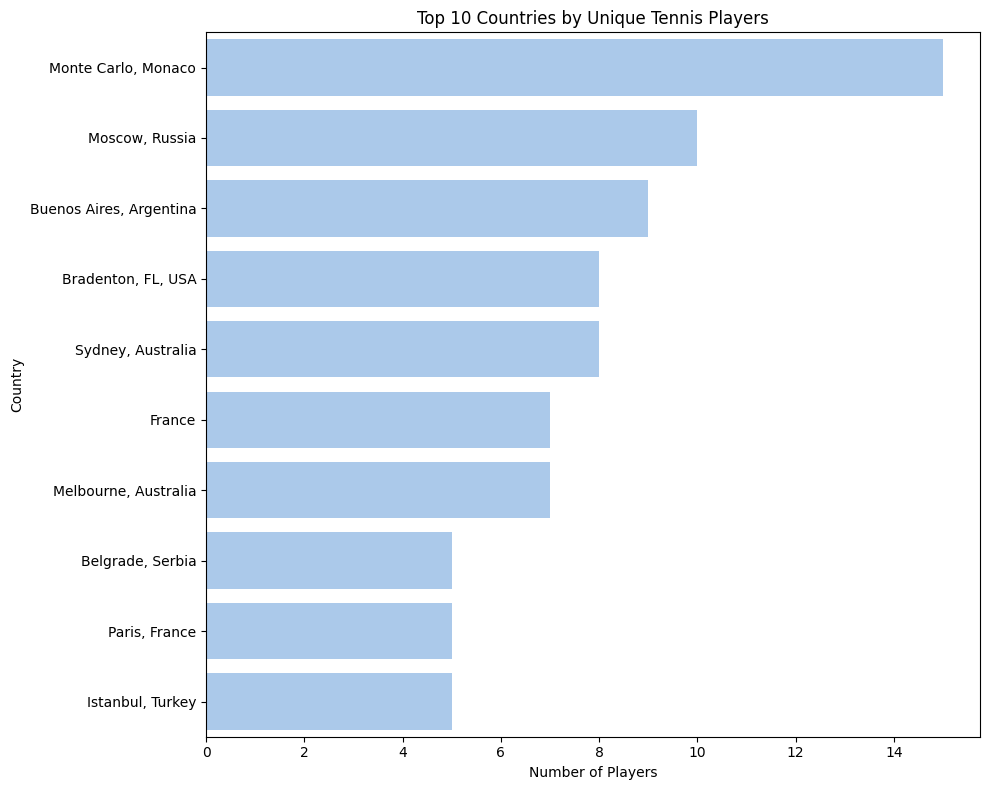

In [ ]:
country_counts = (
    clean_df.drop_duplicates(subset=["name", "residence"])["residence"]
    .value_counts()
    .reset_index()
)
country_counts.columns = ["Country", "Count"]

top_countries = country_counts.head(10)

plt.figure(figsize=(10, 8))
sns.barplot(
    y="Country", x="Count", data=top_countries, color=sns.color_palette("pastel")[0]
)
plt.title("Top 10 Countries by Unique Tennis Players")
plt.xlabel("Number of Players")
plt.ylabel("Country")
plt.tight_layout()
plt.show()